In [16]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the preprocessed data from CSV
df = pd.read_csv("new_preprocessed_data.csv")

# Assuming 'X' is your feature set and 'y' is your target variable with genres encoded 0-9
X = df.drop('music_genre', axis=1)  # Drop the target column to isolate features
y = df['music_genre']  # Target column with genres encoded from 0 to 9

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_model = svm.SVC(kernel='linear', decision_function_shape='ovr')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.47      0.83      0.60       856
           1       0.78      0.79      0.78       919
           2       0.67      0.59      0.63       873
           3       0.93      0.82      0.87       881
           4       0.70      0.62      0.65       921
           5       0.67      0.58      0.62       931
           6       0.47      0.45      0.46       905
           7       0.75      0.65      0.69       888
           8       0.48      0.34      0.40       914
           9       0.53      0.65      0.59       916

    accuracy                           0.63      9004
   macro avg       0.64      0.63      0.63      9004
weighted avg       0.64      0.63      0.63      9004



In [9]:
# Non-Linear SVM Classifier (RBF Kernel)
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = rbf_svc.predict(X_test)


In [10]:
print("Non-Linear SVM (RBF Kernel) Accuracy:\n", classification_report(y_test, y_pred))


Non-Linear SVM (RBF Kernel) Accuracy:
               precision    recall  f1-score   support

           0       0.46      0.93      0.62       856
           1       0.86      0.89      0.87       919
           2       0.79      0.72      0.75       873
           3       0.90      0.81      0.86       881
           4       0.76      0.83      0.79       921
           5       0.95      0.69      0.80       931
           6       0.39      0.52      0.44       905
           7       0.86      0.73      0.79       888
           8       0.37      0.36      0.37       914
           9       0.42      0.09      0.15       916

    accuracy                           0.65      9004
   macro avg       0.68      0.66      0.64      9004
weighted avg       0.68      0.65      0.64      9004



In [11]:
# Polynomial Kernel SVM
poly_svc = svm.SVC(kernel='poly', degree=3)
poly_svc.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = poly_svc.predict(X_test)
print("Polynomial Kernel SVM Accuracy:\n", classification_report(y_test, y_pred))

Polynomial Kernel SVM Accuracy:
               precision    recall  f1-score   support

           0       0.46      0.93      0.62       856
           1       0.86      0.93      0.89       919
           2       0.79      0.71      0.75       873
           3       0.90      0.81      0.85       881
           4       0.77      0.86      0.81       921
           5       0.93      0.70      0.80       931
           6       0.46      0.51      0.48       905
           7       0.85      0.73      0.79       888
           8       0.39      0.39      0.39       914
           9       0.51      0.16      0.25       916

    accuracy                           0.67      9004
   macro avg       0.69      0.67      0.66      9004
weighted avg       0.69      0.67      0.66      9004



In [12]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [10],  
              'gamma': [0.1], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)


# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.750 total time= 1.6min
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.748 total time= 1.6min
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.746 total time= 1.8min
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.742 total time= 1.6min
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.740 total time= 1.6min
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [13]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       856
           1       0.96      0.93      0.95       919
           2       0.85      0.85      0.85       873
           3       0.86      0.94      0.90       881
           4       0.84      0.82      0.83       921
           5       0.91      0.88      0.90       931
           6       0.49      0.51      0.50       905
           7       0.84      0.83      0.83       888
           8       0.42      0.39      0.41       914
           9       0.61      0.62      0.62       916

    accuracy                           0.75      9004
   macro avg       0.75      0.75      0.75      9004
weighted avg       0.75      0.75      0.75      9004



Text(0.5, 1.0, 'SVM (rbf) Confusion Matrix')

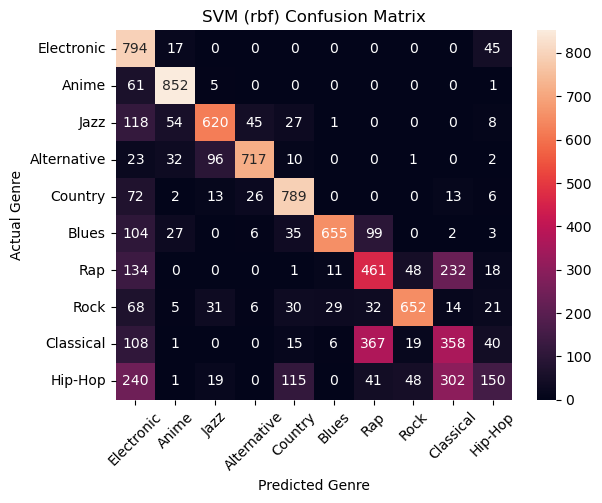

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Blues', 'Rap', 'Rock', 'Classical', 'Hip-Hop']
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax, xticklabels=labels, yticklabels=labels)

# labels, title and ticks
ax.set_xticklabels(labels, rotation = 45)
ax.set_xlabel('Predicted Genre')
ax.set_ylabel('Actual Genre') 
ax.set_title('SVM (rbf) Confusion Matrix')